In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

In [3]:
# Loading the data from keras
mnist=tf.keras.datasets.mnist

In [4]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.9/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [55]:
# Assign dataset into train and test set
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [16]:
X_train_full[0] 
# Image is an array having pixel value of 0 to 256. 0-Pure white,255-Pure black

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

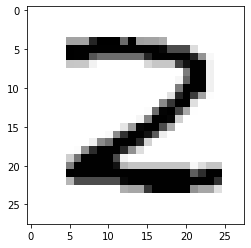

In [17]:
# Loading the figure dataset
plt.imshow(X_train_full[220] ,cmap='binary')
plt.axis='off'
plt.show()

<AxesSubplot:>

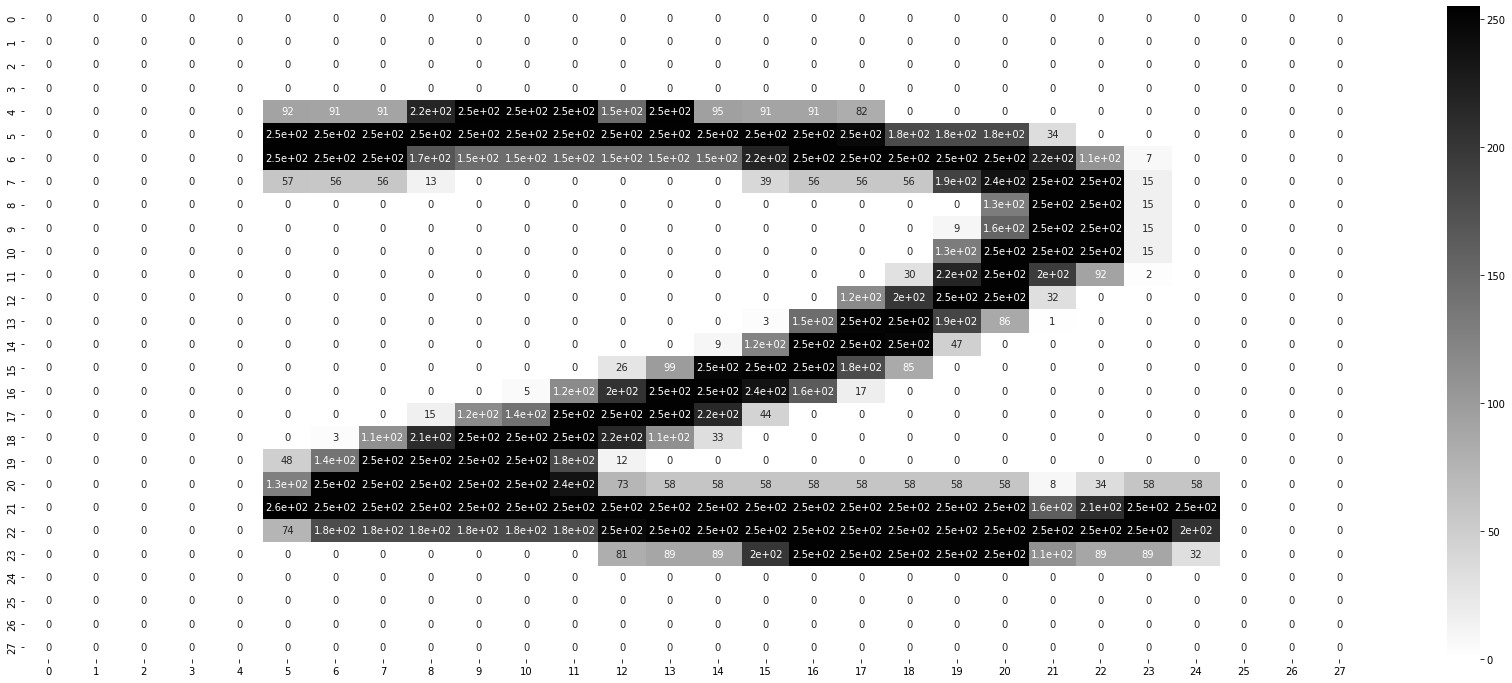

In [19]:

plt.figure(figsize=(30,12))
sns.heatmap(X_train_full[220],annot=True,cmap='binary')

In [57]:
# Split train data with validation split
# /255 to reduce the scaling by unit scaling [0-1]of data as we will use GD in back propagation so converging will be easier
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test/255.

In [58]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(55000, 28, 28)
(55000,)
(5000, 28, 28)
(5000,)


<AxesSubplot:>

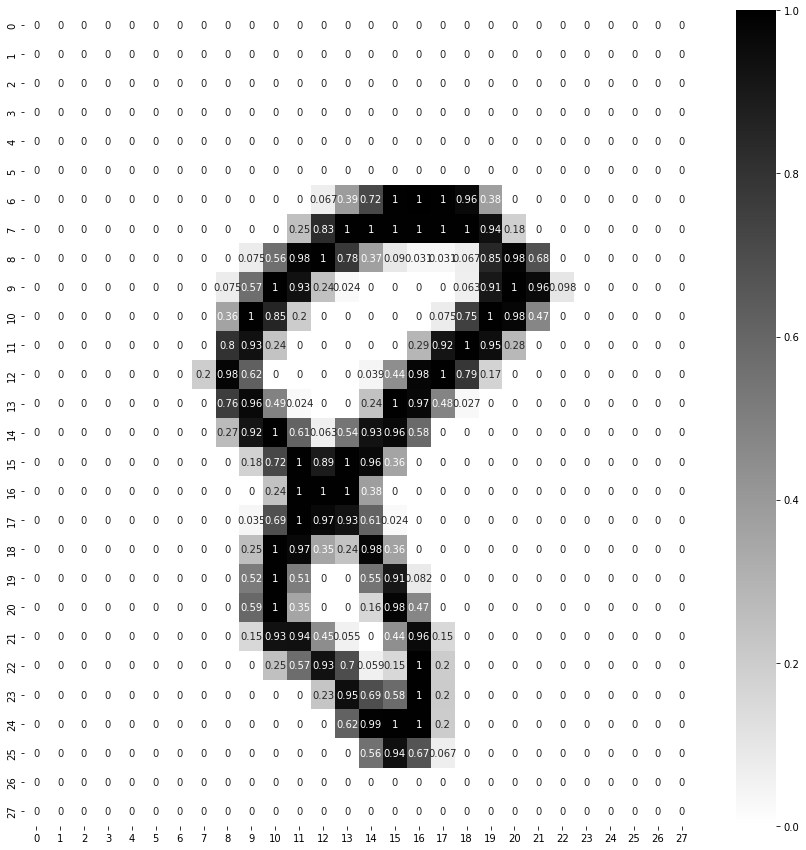

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[220],annot=True,cmap='binary')

In [24]:
# LEts build ann model

In [34]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name='inputlayer'),
        tf.keras.layers.Dense(300,activation='relu',name='hiddenlayer1'),
        tf.keras.layers.Dense(300,activation='relu',name='hiddenlayer2'),
        tf.keras.layers.Dense(10,activation='softmax',name='outputlayer')
        ]


In [35]:
## Flattening an image dataset means converting each image in the dataset from a 2D or 3D array of pixel values to a 1D array of pixel values.
# eg: 28,28 so flatten will  make 784 which is input size
# 300 is the number of neuron
#10 as 0-9 images are presrent in the labeled column

In [36]:
model_clf=tf.keras.models.Sequential(LAYERS)

In [37]:
model_clf.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 300)               90300     
                                                                 
 outputlayer (Dense)         (None, 10)                3010      
                                                                 
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [38]:
LOSS_FUNCTION='sparse_categorical_crossentropy'
OPTIMIZER='adam'
metrics=['accuracy']

In [40]:
model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=metrics)

In [43]:
# U can see the layer name by this
model_clf.layers[1].name

'hiddenlayer1'

In [44]:
hidden1=model_clf.layers[1]

In [45]:
# It will show the initial weight assignments to hidden layer 1
hidden1.get_weights()

[array([[-0.0038472 ,  0.00992518,  0.02380309, ...,  0.06274377,
          0.03787417, -0.01940842],
        [-0.05953379,  0.05209808,  0.04406147, ..., -0.04244447,
          0.04065768,  0.01226448],
        [ 0.05364597, -0.06751898,  0.05972202, ...,  0.0548767 ,
         -0.00507178, -0.00497481],
        ...,
        [-0.01232708, -0.00925773, -0.0730934 , ..., -0.0743524 ,
          0.00798187,  0.02355101],
        [ 0.06997304, -0.02438256,  0.05262426, ...,  0.00277159,
         -0.01938692, -0.07422247],
        [-0.01941938,  0.06560995,  0.05182981, ..., -0.02465943,
         -0.00601217, -0.04143955]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [46]:
weights,biases=hidden1.get_weights()

In [59]:
# lets train the model
EPOCHS=5
VALIDATION_SET=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 11s 3ms/step - loss: 0.2075 - accuracy: 0.9376 - val_loss: 0.1108 - val_accuracy: 0.9624
Epoch 2/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0852 - accuracy: 0.9731 - val_loss: 0.0898 - val_accuracy: 0.9754
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0594 - accuracy: 0.9809 - val_loss: 0.0746 - val_accuracy: 0.9770
Epoch 4/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0434 - accuracy: 0.9871 - val_loss: 0.0844 - val_accuracy: 0.9744
Epoch 5/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0337 - accuracy: 0.9890 - val_loss: 0.0827 - val_accuracy: 0.9806


In [60]:
# lets save the model

In [68]:
import time
import os
def save_model_path(model_dir='/content/SAVED_MODELs/'):
  os.makedirs(model_dir,exist_ok=True)
  filename=time.strftime('Model_%Y_%m_%d_%H_%M_%S_.h5')
  model_path=os.path.join(model_dir,filename)
  print(f"your model will be saved at following location\n{model_path}")
  return model_path

In [69]:
model_clf.save(save_model_path())

your model will be saved at following location
/content/SAVED_MODELs/Model_2023_03_09_06_34_56_.h5


In [70]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [72]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.207525,0.937600,0.110832,0.9624
1,0.085154,0.973073,0.089796,0.9754
2,0.059400,0.980945,0.074597,0.9770
3,0.043375,0.987091,0.084368,0.9744
4,0.033698,0.989000,0.082684,0.9806


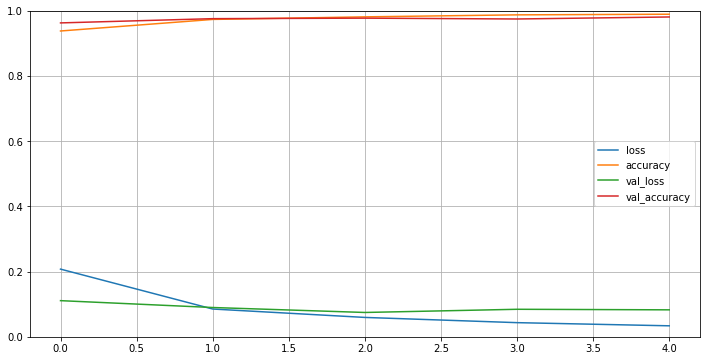

In [73]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [74]:
# Lets Predict
model_clf.evaluate(X_test,y_test)
# My accuracy in blid data os 98.05

313/313 [==============================] - 1s 3ms/step - loss: 0.0744 - accuracy: 0.9806


[0.07438536733388901, 0.9805999994277954]

In [75]:
# Lets pedict for single data

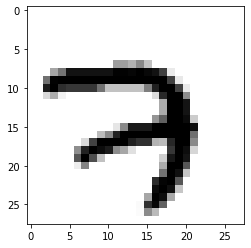

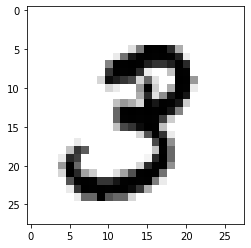

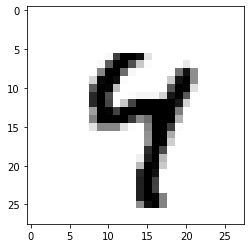

In [79]:
for i in range(0,3):
  plt.imshow(X_train[i] ,cmap='binary')
  plt.axis='off'
  plt.show()

In [80]:
model_clf.predict(X_test[:3])

1/1 [==============================] - 0s 80ms/step


array([[2.78833512e-10, 4.63468240e-07, 4.62559086e-07, 6.54026826e-06,
        4.80606808e-08, 3.42695938e-09, 5.14295366e-13, 9.99988556e-01,
        2.69922182e-08, 3.95935558e-06],
       [5.66976667e-07, 3.60365289e-06, 9.99991536e-01, 1.74935144e-06,
        4.20579578e-11, 4.57624205e-09, 1.00155326e-07, 4.93485519e-09,
        2.42888905e-06, 1.69691377e-12],
       [3.94529565e-09, 9.99903083e-01, 5.91279604e-06, 2.56494603e-10,
        3.22925962e-06, 2.87091240e-09, 1.03185229e-07, 8.68939605e-05,
        6.62924890e-07, 3.21392668e-09]], dtype=float32)

In [81]:
## Lets see for 0th index 

In [88]:
prediction=model_clf.predict(X_test[:3])


1/1 [==============================] - 0s 20ms/step


In [89]:
prediction[0]
# Thisis the probabiility of getting 0-9 at labeled column

array([2.7883351e-10, 4.6346824e-07, 4.6255909e-07, 6.5402683e-06,
       4.8060681e-08, 3.4269594e-09, 5.1429537e-13, 9.9998856e-01,
       2.6992218e-08, 3.9593556e-06], dtype=float32)

In [90]:
y_prob=prediction[0]

In [92]:
y_prob.round(1)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [93]:
# will give the max value index in the array
np.argmax(y_prob.round(1))

7

In [94]:
# U can see when we predict 7 is coming so our model is good with accuracy around 98%